# Assignments

1.Recode all examples

2.Please change image color through YUV space

3.Combine image crop, color shift, rotation and perspective transform together to complete a data aumentation script

4.Do think about your own interests very carefully and choose your topic within 4 weeks

### 1.Recode the examples
### 2.Please change image color through YUV space

#### 工具包导入

In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### 灰度图导入/输出

In [3]:
#最后的flag表示颜色加载类型，0就是灰度返回，1就是原图返回;图片存于中文路径有报错风险
img_gray = cv2.imread('lenna.jpg',0)

In [4]:
cv2.imshow('lenna_gray',img_gray)
#等用户按下esc(代号27)，则关闭所有窗口
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [4]:
#Cpp中数据类型就是uchar了
print(img_gray,img_gray.dtype,img_gray.shape)

[[162 161 160 ... 171 156 133]
 [162 162 161 ... 169 155 133]
 [163 162 161 ... 168 154 135]
 ...
 [ 42  47  52 ... 101 100  99]
 [ 42  47  52 ... 103 103 104]
 [ 42  47  52 ... 103 105 106]] uint8 (500, 500)


#### 原图导入/输出

In [5]:
img = cv2.imread('lenna.jpg',1)
cv2.imshow('lenna',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [8]:
print(img)

[[[125 137 225]
  [124 136 224]
  [123 135 223]
  ...
  [118 144 244]
  [103 129 229]
  [ 80 106 206]]

 [[125 137 225]
  [125 137 225]
  [124 136 224]
  ...
  [119 142 241]
  [105 128 227]
  [ 83 106 205]]

 [[124 138 227]
  [123 137 226]
  [122 136 225]
  ...
  [124 142 237]
  [111 127 223]
  [ 92 108 204]]

 ...

 [[ 60  19  80]
  [ 63  25  85]
  [ 64  30  91]
  ...
  [ 82  66 178]
  [ 81  65 177]
  [ 80  64 176]]

 [[ 60  19  80]
  [ 63  25  85]
  [ 64  30  91]
  ...
  [ 82  68 180]
  [ 82  68 180]
  [ 83  69 181]]

 [[ 60  19  80]
  [ 63  25  85]
  [ 64  30  91]
  ...
  [ 82  68 180]
  [ 84  70 182]
  [ 85  71 183]]]


In [9]:
print(img.dtype,img.shape)#height,width,channel

uint8 (500, 500, 3)


#### Image Crop

In [10]:
img_crop = img[0:100,0:200]
cv2.imshow('lenna_crop',img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

#### Color Split

In [11]:
B,G,R = cv2.split(img)
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

#### Change color

In [12]:
def random_light_color(img):
    B,G,R = cv2.split(img)
    #蓝色灰度矩阵整体偏移，＞255取255，<0就取0
    b_rand = random.randint(-50,50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
    #绿色灰度矩阵整体偏移，＞255取255，<0就取0
    g_rand = random.randint(-50,50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
    #红色灰度矩阵整体偏移，＞255取255，<0就取0
    r_rand = random.randint(-50,50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
    img_merge = cv2.merge((B,G,R))
    return img_merge

In [15]:
img_random_color = random_light_color(img)
cv2.imshow('img_random_color',img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

#### gamma correction

In [10]:
img_bright = cv2.imread('brighter.jpg')
cv2.imshow('brighter',img_bright)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [11]:
def adjust_gamma(image,gamma = 1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append((i/255)**invGamma * 255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(image,table)
#这里只找到一张很亮的素材，所以跟课程相反，我把它调暗了
img_dark = adjust_gamma(img_bright,0.5)
cv2.imshow('image_bright',img_bright)
cv2.imshow('image_dark',img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

#### histogram

(array([8.000e+00, 3.400e+01, 3.930e+02, 7.490e+02, 1.108e+03, 9.250e+02,
        1.160e+03, 1.291e+03, 1.176e+03, 1.096e+03, 1.264e+03, 1.459e+03,
        1.520e+03, 1.531e+03, 1.534e+03, 1.707e+03, 1.865e+03, 1.858e+03,
        2.029e+03, 2.080e+03, 2.102e+03, 2.225e+03, 2.463e+03, 2.447e+03,
        2.601e+03, 2.497e+03, 2.359e+03, 2.139e+03, 1.755e+03, 1.592e+03,
        1.407e+03, 1.278e+03, 1.176e+03, 9.930e+02, 9.000e+02, 8.960e+02,
        8.980e+02, 8.720e+02, 8.890e+02, 9.020e+02, 7.920e+02, 7.500e+02,
        8.260e+02, 8.330e+02, 8.780e+02, 9.210e+02, 8.840e+02, 9.010e+02,
        8.940e+02, 7.850e+02, 7.810e+02, 7.920e+02, 8.200e+02, 7.920e+02,
        8.430e+02, 9.030e+02, 9.180e+02, 8.990e+02, 9.250e+02, 9.050e+02,
        9.230e+02, 9.540e+02, 8.270e+02, 8.540e+02, 9.700e+02, 9.910e+02,
        1.065e+03, 1.126e+03, 9.440e+02, 9.560e+02, 9.220e+02, 9.060e+02,
        9.470e+02, 9.920e+02, 9.770e+02, 9.920e+02, 1.003e+03, 1.010e+03,
        9.890e+02, 1.037e+03, 1.049e+0

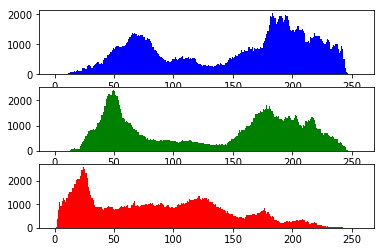

In [14]:
img_small_brighter = cv2.resize(img_bright,(int(img_bright.shape[0]*0.5),int(img_bright.shape[1]*0.5)))
#蓝色的直方图
plt.subplot(3,1,1)
plt.hist(img_small_brighter.flatten()[:img_small_brighter.size//3],256,[0,256],color = 'b')
#绿色的直方图
plt.subplot(3,1,2)
plt.hist(img_small_brighter.flatten()[img_small_brighter.size//3:-img_small_brighter.size//3],256,[0,256],color = 'g')
#红色的直方图
plt.subplot(3,1,3)
plt.hist(img_small_brighter.flatten()[-img_small_brighter.size//3:],256,[0,256],color = 'r')


### change image color through YUV space

In [15]:
#将BGR转换到YUV空间
img_yuv = cv2.cvtColor(img_small_brighter,cv2.COLOR_BGR2YUV)
#对Y(明亮程度)进行均衡
img_yuv_equalY = img_yuv.copy()
img_yuv_equalY[:,:,0] = cv2.equalizeHist(img_yuv_equalY[:,:,0])
#对U进行均衡
img_yuv_equalU = img_yuv.copy()
img_yuv_equalU[:,:,1] = cv2.equalizeHist(img_yuv_equalU[:,:,1])
#对V进行均衡
img_yuv_equalV = img_yuv.copy()
img_yuv_equalV[:,:,2] = cv2.equalizeHist(img_yuv_equalV[:,:,2])
#YUV空间的值重新计算BGR
img_bgr_equalY = cv2.cvtColor(img_yuv_equalY,cv2.COLOR_YUV2BGR)
img_bgr_equalU = cv2.cvtColor(img_yuv_equalU,cv2.COLOR_YUV2BGR)
img_bgr_equalV = cv2.cvtColor(img_yuv_equalV,cv2.COLOR_YUV2BGR)
#打印原图，均衡Y,均衡U,均衡V的图
cv2.imshow('img_small_brighter',img_small_brighter)
cv2.imshow('img_bgr_equalY',img_bgr_equalY)
cv2.imshow('img_bgr_equalU',img_bgr_equalU)
cv2.imshow('img_bgr_equalV',img_bgr_equalV)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

### Rotation

In [20]:
#图像中心旋转
#旋转中心，旋转角度，缩放倍数,要注意h,w,c，高度h对应的是坐标y
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),30,1)
img_rotate = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('img_rotate',img_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [21]:
print(M)

[[  0.8660254    0.5        -91.50635095]
 [ -0.5          0.8660254  158.49364905]]


In [22]:
#去除平移
M[0][2] = M[1][2] = 0
print(M)

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


In [23]:
#不平移的旋转，以左上角为中心原点进行了旋转
img_rotate2 = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('img_rotate2',img_rotate2)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

#### Similarity Transform

In [24]:
#旋转中心，旋转角度，缩放倍数
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),30,0.5)
img_rotate3 = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('img_rotate3',img_rotate3)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [25]:
print(M)

[[  0.4330127    0.25        79.24682453]
 [ -0.25         0.4330127  204.24682453]]


#### Affine Transform

In [26]:
rows,cols,ch = img.shape
#变换前不共线的三个点和变换后不共线的三个点
pts1 = np.float32([[0,0],[cols - 1,0],[0,rows - 1]])
pts2 = np.float32([[cols * 0.2,rows * 0.1],[cols * 0.9,rows * 0.2],[cols * 0.1,rows * 0.6]])
M = cv2.getAffineTransform(pts1,pts2)
img_affine = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('img_affine',img_affine)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [27]:
print(M)

[[  0.70140281  -0.1002004  100.        ]
 [  0.1002004    0.501002    50.        ]]


#### Perspective Transform

In [16]:
def random_warp(img,row,col,random_margin = 60):
    height,width,channel = img.shape
    #原图4个不共线点
    x1 = random.randint(-random_margin,random_margin)
    y1 = random.randint(-random_margin,random_margin)
    x2 = random.randint(width - random_margin - 1,width - 1)
    y2 = random.randint(-random_margin,random_margin)
    x3 = random.randint(width - random_margin - 1,width - 1)
    y3 = random.randint(height - random_margin - 1,height - 1)
    x4 = random.randint(-random_margin,random_margin)
    y4 = random.randint(height - random_margin - 1,height - 1)
    #目标图4个不共线点
    dx1 = random.randint(-random_margin,random_margin)
    dy1 = random.randint(-random_margin,random_margin)
    dx2 = random.randint(width - random_margin - 1,width - 1)
    dy2 = random.randint(-random_margin,random_margin)
    dx3 = random.randint(width - random_margin - 1,width - 1)
    dy3 = random.randint(height - random_margin - 1,height - 1)
    dx4 = random.randint(-random_margin,random_margin)
    dy4 = random.randint(height - random_margin - 1,height - 1)
    
    pst1 = np.float32([[x1,y1],[x2,y2],[x3,y3],[x4,y4]])
    pst2 = np.float32([[dx1,dy1],[dx2,dy2],[dx3,dy3],[dx4,dy4]])
    M_warp = cv2.getPerspectiveTransform(pst1,pst2)
    img_warp = cv2.warpPerspective(img,M_warp,(width,height))
    return M_warp,img_warp

In [17]:
M_warp,img_warp = random_warp(img,img.shape[0],img.shape[1])
cv2.imshow('img_warp',img_warp)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    cv2.waitKey(1)

### 3.Combine image crop, color shift, rotation and perspective transform together to complete a data aumentation script
另附python脚本

### 4.Do think about your own interests very carefully and choose your topic within 4 weeks
目前对Face Detection/Recognition、Object Detection、Super Resolution、Reflection Removal比较感兴趣，近两周再详细看看paper。